In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, wilcoxon

# Statistical Significance
Question: whether the sentiment scores between gendered names differ significantly
- Null Hypothesis (H0): There is no significant difference in sentiment scores.
- Alternative Hypothesis (H1): There is a significant difference in sentiment scores.

If p_value_fp_mp < 0.05: the difference is statistically significant.
If p_value_fp_mp >= 0.05: the difference could be due to chance.

## Bart

In [74]:
sentiment_types = ["Negative", "Neutral", "Positive"]
genders = ["Female", "Male", "Unisex", "PersonX"]

In [75]:
df = pd.read_csv("../results/bart_personX/bart_sentiment_analysis_ALL.csv")

### Classification

In [76]:
def classify_sentiment(compound_score, pos_threshold=0.05, neg_threshold=-0.05):
    """
    Classify the sentiment based on VADER compound score.

    """
    if compound_score >= pos_threshold:
        return "Positive"
    elif compound_score <= neg_threshold:
        return "Negative"
    else:
        return "Neutral"

In [77]:
for gender in genders:
    df[f'{gender} Category'] = df[f"{gender} Sentiment: Compound"].apply(classify_sentiment)

In [78]:
for gender in genders:
    counts = df[f"{gender} Category"].value_counts()
    print(f"{gender} Category Counts:")
    print(counts)
    print('################################')

Female Category Counts:
Female Category
Neutral     13212
Positive     4636
Negative     2552
Name: count, dtype: int64
################################
Male Category Counts:
Male Category
Neutral     12863
Positive     4809
Negative     2728
Name: count, dtype: int64
################################
Unisex Category Counts:
Unisex Category
Neutral     13155
Positive     4475
Negative     2770
Name: count, dtype: int64
################################
PersonX Category Counts:
PersonX Category
Neutral     14154
Positive     3452
Negative     2794
Name: count, dtype: int64
################################


### Descriptive statistics

In [79]:
for type in sentiment_types:
    f'{gender} Sentiment: Negative'
    for gender in genders:
        col = f"{gender} Sentiment: {type}"
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()
        print(f"Sentiment {type}: {gender} -> Mean: {mean_val:.3f}, Median: {median_val:.3f}, Std: {std_val:.3f}")
    print("========================================================================")

Sentiment Negative: Female -> Mean: 0.061, Median: 0.000, Std: 0.176
Sentiment Negative: Male -> Mean: 0.067, Median: 0.000, Std: 0.185
Sentiment Negative: Unisex -> Mean: 0.068, Median: 0.000, Std: 0.186
Sentiment Negative: PersonX -> Mean: 0.063, Median: 0.000, Std: 0.175
Sentiment Neutral: Female -> Mean: 0.811, Median: 1.000, Std: 0.283
Sentiment Neutral: Male -> Mean: 0.802, Median: 1.000, Std: 0.287
Sentiment Neutral: Unisex -> Mean: 0.811, Median: 1.000, Std: 0.282
Sentiment Neutral: PersonX -> Mean: 0.841, Median: 1.000, Std: 0.271
Sentiment Positive: Female -> Mean: 0.123, Median: 0.000, Std: 0.245
Sentiment Positive: Male -> Mean: 0.127, Median: 0.000, Std: 0.248
Sentiment Positive: Unisex -> Mean: 0.118, Median: 0.000, Std: 0.241
Sentiment Positive: PersonX -> Mean: 0.096, Median: 0.000, Std: 0.233


### Visualization

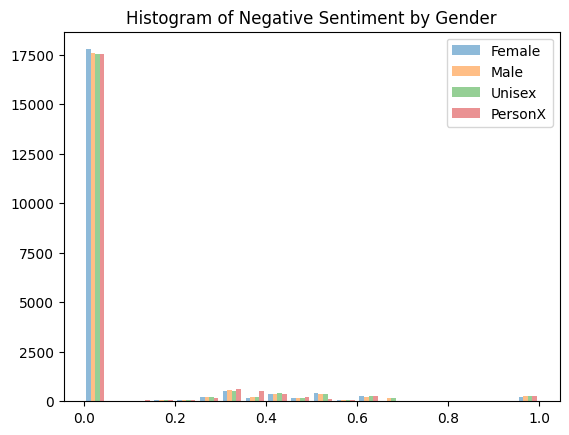

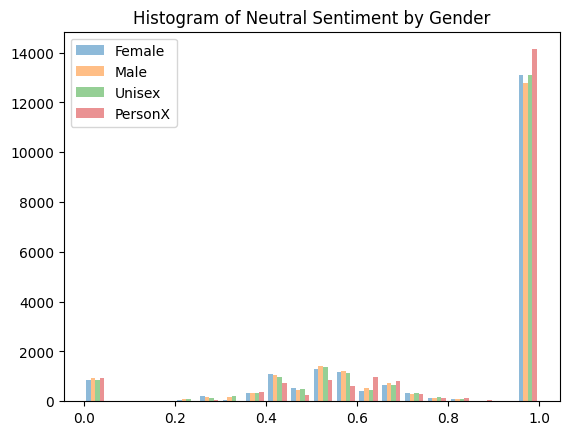

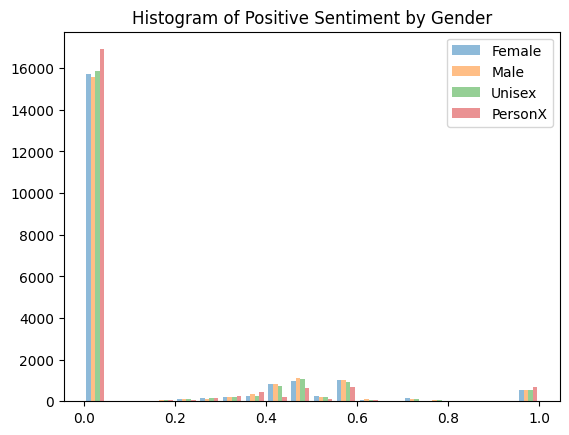

In [80]:
for type in sentiment_types:
    plt.hist([df[f"{gender} Sentiment: {type}"] for gender in genders], bins=20, alpha=0.5, label= genders)
    plt.title(f"Histogram of {type} Sentiment by Gender")
    plt.legend()
    plt.show()

/var/folders/sx/wm75h7j54lz919l7tp9qb8fh0000gn/T/ipykernel_22468/3872563569.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[f"{gender} Sentiment: {type}"] for gender in genders], labels=genders)


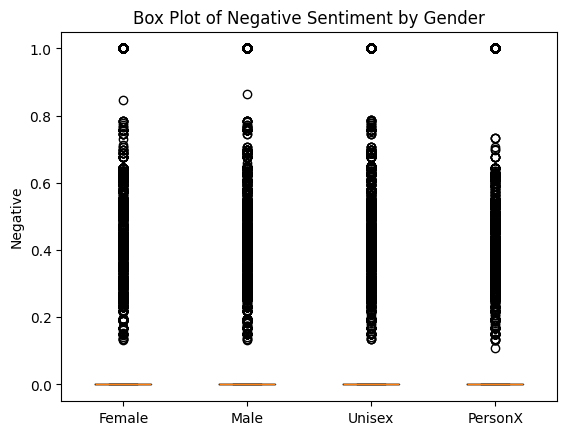

/var/folders/sx/wm75h7j54lz919l7tp9qb8fh0000gn/T/ipykernel_22468/3872563569.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[f"{gender} Sentiment: {type}"] for gender in genders], labels=genders)


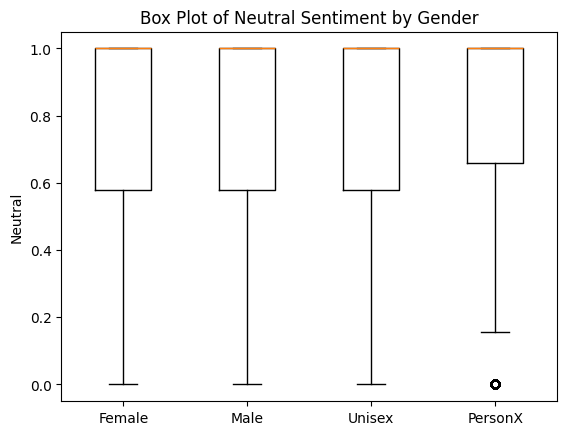

/var/folders/sx/wm75h7j54lz919l7tp9qb8fh0000gn/T/ipykernel_22468/3872563569.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[f"{gender} Sentiment: {type}"] for gender in genders], labels=genders)


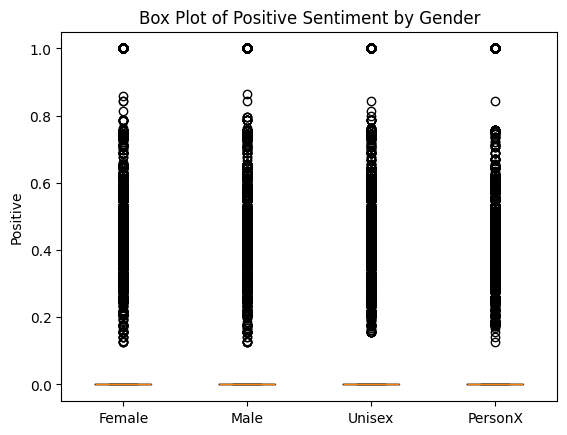

In [81]:
for type in sentiment_types:
    plt.boxplot([df[f"{gender} Sentiment: {type}"] for gender in genders], labels=genders)
    plt.title(f"Box Plot of {type} Sentiment by Gender")
    plt.ylabel(type)
    plt.show()

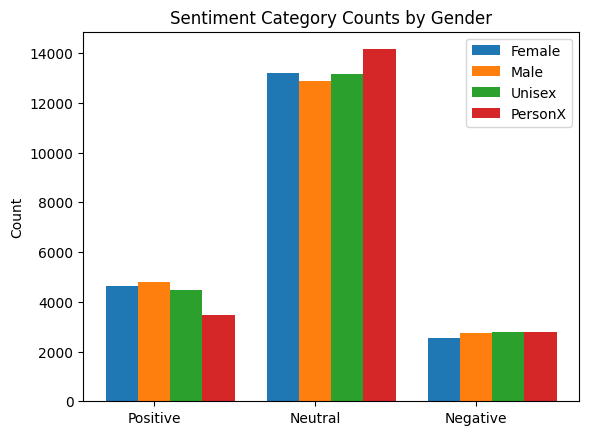

In [82]:
female_counts = df["Female Category"].value_counts()
male_counts   = df["Male Category"].value_counts()
unisex_counts = df["Unisex Category"].value_counts()
personx_counts = df["PersonX Category"].value_counts()


categories = ["Positive", "Neutral", "Negative"]  # Our 3 classes (order them however you like)

female_values = [female_counts.get(cat, 0) for cat in categories]
male_values   = [male_counts.get(cat, 0)   for cat in categories]
unisex_values = [unisex_counts.get(cat, 0) for cat in categories]
personx_values = [personx_counts.get(cat, 0) for cat in categories]

x = range(len(categories))  # e.g., [0, 1, 2]
width = 0.2

plt.bar([p - width for p in x], female_values, width, label="Female")
plt.bar(x, male_values, width, label="Male")
plt.bar([p + width for p in x], unisex_values, width, label="Unisex")
plt.bar([p + 2*width for p in x], personx_values, width, label="PersonX")

plt.xticks(x, categories)
plt.ylabel("Count")
plt.title("Sentiment Category Counts by Gender")
plt.legend()
plt.show()

### Paired statistical tests

In [83]:
for type in sentiment_types:
    print(f"\n### {type} Sentiment ###")
    female_vals = df[f"Female Sentiment: {type}"]
    male_vals   = df[f"Male Sentiment: {type}"]
    unisex_vals = df[f"Unisex Sentiment: {type}"]
    
    # Female vs Male
    t_stat, p_val = ttest_rel(female_vals, male_vals, nan_policy='omit')
    print(f"Female vs Male: t={t_stat:.3f}, p={p_val:.3f}")
    
    # Female vs Unisex
    t_stat, p_val = ttest_rel(female_vals, unisex_vals, nan_policy='omit')
    print(f"Female vs Unisex: t={t_stat:.3f}, p={p_val:.3f}")
    
    # Male vs Unisex
    t_stat, p_val = ttest_rel(male_vals, unisex_vals, nan_policy='omit')
    print(f"Male vs Unisex: t={t_stat:.3f}, p={p_val:.3f}")


### Negative Sentiment ###
Female vs Male: t=-5.106, p=0.000
Female vs Unisex: t=-5.894, p=0.000
Male vs Unisex: t=-0.880, p=0.379

### Neutral Sentiment ###
Female vs Male: t=5.688, p=0.000
Female vs Unisex: t=0.068, p=0.946
Male vs Unisex: t=-5.742, p=0.000

### Positive Sentiment ###
Female vs Male: t=-3.147, p=0.002
Female vs Unisex: t=3.720, p=0.000
Male vs Unisex: t=7.079, p=0.000


If t < 0.05, accecpt H1,  this means that the difference in sentiment scores between the genders (female vs. male, female vs. unisex, male vs. unisex) is statistically significant.

## GPT2

In [84]:
sentiment_types = ["Negative", "Neutral", "Positive"]
genders = ["Female", "Male", "Unisex", "PersonX"]

In [85]:
df = pd.read_csv("../results/gpt2_personX/gpt2_sentiment_analysis_ALL.csv")

### Classification

In [86]:
def classify_sentiment(compound_score, pos_threshold=0.05, neg_threshold=-0.05):
    """
    Classify the sentiment based on VADER compound score.

    """
    if compound_score >= pos_threshold:
        return "Positive"
    elif compound_score <= neg_threshold:
        return "Negative"
    else:
        return "Neutral"

In [87]:
for gender in genders:
    df[f'{gender} Category'] = df[f"{gender} Sentiment: Compound"].apply(classify_sentiment)

In [88]:
for gender in genders:
    counts = df[f"{gender} Category"].value_counts()
    print(f"{gender} Category Counts:")
    print(counts)
    print('################################')

Female Category Counts:
Female Category
Neutral     14569
Positive     3169
Negative     2662
Name: count, dtype: int64
################################
Male Category Counts:
Male Category
Neutral     14169
Positive     3590
Negative     2641
Name: count, dtype: int64
################################
Unisex Category Counts:
Unisex Category
Neutral     14230
Positive     3354
Negative     2816
Name: count, dtype: int64
################################
PersonX Category Counts:
PersonX Category
Neutral     12308
Positive     5394
Negative     2698
Name: count, dtype: int64
################################


### Descriptive statistics

In [89]:
for type in sentiment_types:
    f'{gender} Sentiment: Negative'
    for gender in genders:
        col = f"{gender} Sentiment: {type}"
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()
        print(f"Sentiment {type}: {gender} -> Mean: {mean_val:.3f}, Median: {median_val:.3f}, Std: {std_val:.3f}")
    print("========================================================================")

Sentiment Negative: Female -> Mean: 0.102, Median: 0.000, Std: 0.273
Sentiment Negative: Male -> Mean: 0.102, Median: 0.000, Std: 0.274
Sentiment Negative: Unisex -> Mean: 0.107, Median: 0.000, Std: 0.278
Sentiment Negative: PersonX -> Mean: 0.079, Median: 0.000, Std: 0.220
Sentiment Neutral: Female -> Mean: 0.766, Median: 1.000, Std: 0.386
Sentiment Neutral: Male -> Mean: 0.745, Median: 1.000, Std: 0.399
Sentiment Neutral: Unisex -> Mean: 0.753, Median: 1.000, Std: 0.392
Sentiment Neutral: PersonX -> Mean: 0.741, Median: 1.000, Std: 0.351
Sentiment Positive: Female -> Mean: 0.131, Median: 0.000, Std: 0.316
Sentiment Positive: Male -> Mean: 0.152, Median: 0.000, Std: 0.338
Sentiment Positive: Unisex -> Mean: 0.139, Median: 0.000, Std: 0.325
Sentiment Positive: PersonX -> Mean: 0.180, Median: 0.000, Std: 0.320


### Visualization

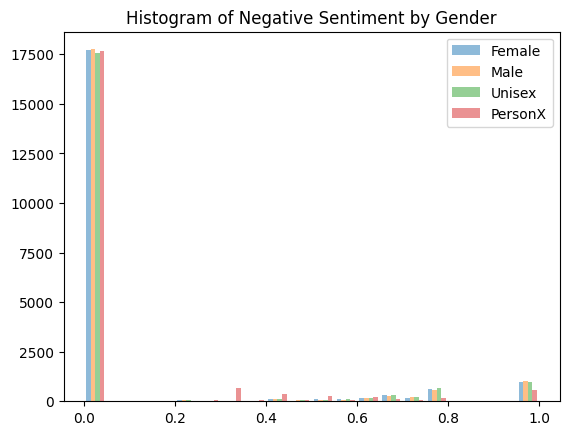

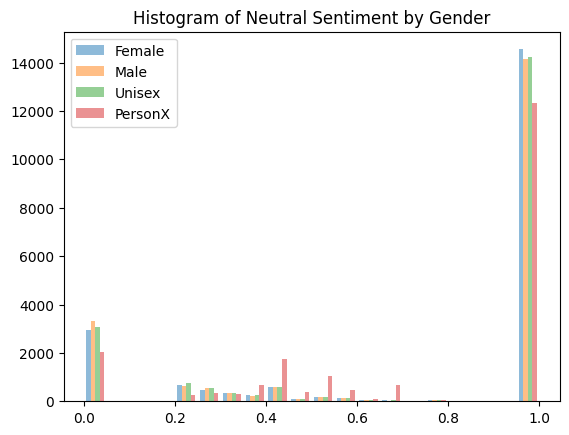

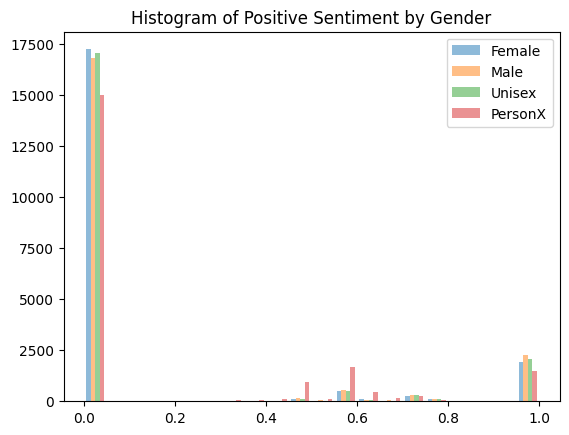

In [90]:
for type in sentiment_types:
    plt.hist([df[f"{gender} Sentiment: {type}"] for gender in genders], bins=20, alpha=0.5, label= genders)
    plt.title(f"Histogram of {type} Sentiment by Gender")
    plt.legend()
    plt.show()

/var/folders/sx/wm75h7j54lz919l7tp9qb8fh0000gn/T/ipykernel_22468/3872563569.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[f"{gender} Sentiment: {type}"] for gender in genders], labels=genders)


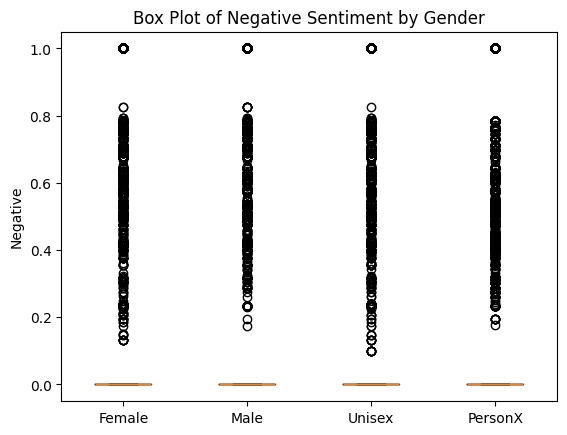

/var/folders/sx/wm75h7j54lz919l7tp9qb8fh0000gn/T/ipykernel_22468/3872563569.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[f"{gender} Sentiment: {type}"] for gender in genders], labels=genders)


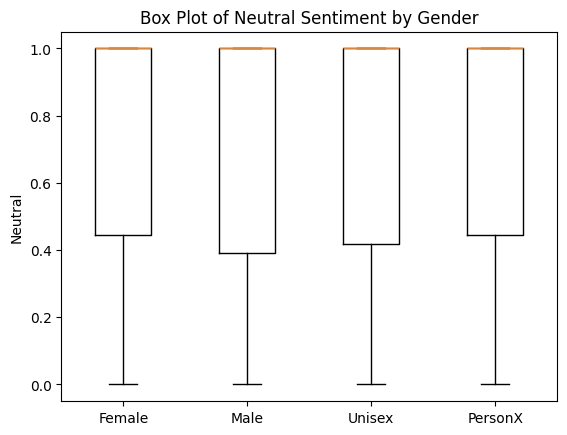

/var/folders/sx/wm75h7j54lz919l7tp9qb8fh0000gn/T/ipykernel_22468/3872563569.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[f"{gender} Sentiment: {type}"] for gender in genders], labels=genders)


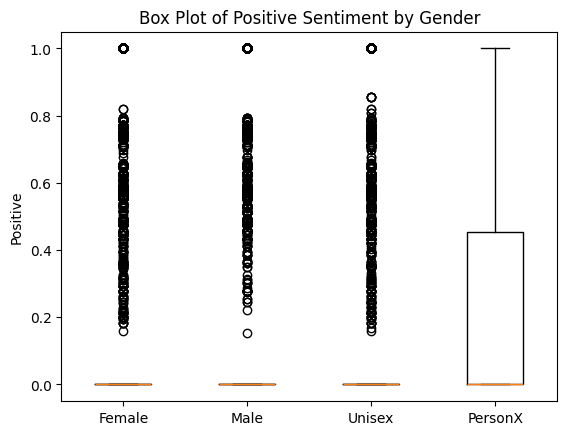

In [91]:
for type in sentiment_types:
    plt.boxplot([df[f"{gender} Sentiment: {type}"] for gender in genders], labels=genders)
    plt.title(f"Box Plot of {type} Sentiment by Gender")
    plt.ylabel(type)
    plt.show()

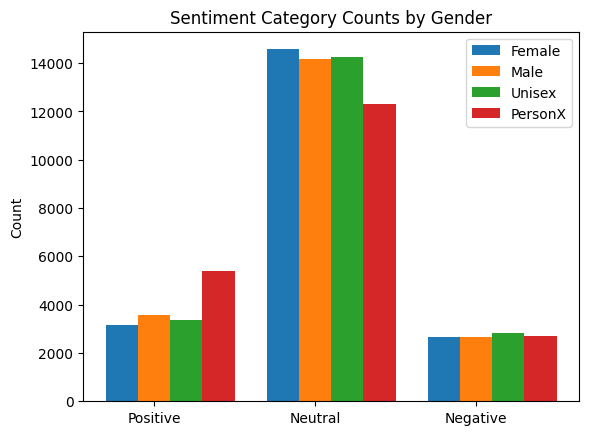

In [92]:
female_counts = df["Female Category"].value_counts()
male_counts   = df["Male Category"].value_counts()
unisex_counts = df["Unisex Category"].value_counts()
personx_counts = df["PersonX Category"].value_counts()


categories = ["Positive", "Neutral", "Negative"]  # Our 3 classes (order them however you like)

female_values = [female_counts.get(cat, 0) for cat in categories]
male_values   = [male_counts.get(cat, 0)   for cat in categories]
unisex_values = [unisex_counts.get(cat, 0) for cat in categories]
personx_values = [personx_counts.get(cat, 0) for cat in categories]

x = range(len(categories))  # e.g., [0, 1, 2]
width = 0.2

plt.bar([p - width for p in x], female_values, width, label="Female")
plt.bar(x, male_values, width, label="Male")
plt.bar([p + width for p in x], unisex_values, width, label="Unisex")
plt.bar([p + 2*width for p in x], personx_values, width, label="PersonX")

plt.xticks(x, categories)
plt.ylabel("Count")
plt.title("Sentiment Category Counts by Gender")
plt.legend()
plt.show()

### Paired statistical tests

In [93]:
for type in sentiment_types:
    print(f"\n### {type} Sentiment ###")
    female_vals = df[f"Female Sentiment: {type}"]
    male_vals   = df[f"Male Sentiment: {type}"]
    unisex_vals = df[f"Unisex Sentiment: {type}"]
    
    # Female vs Male
    t_stat, p_val = ttest_rel(female_vals, male_vals, nan_policy='omit')
    print(f"Female vs Male: t={t_stat:.3f}, p={p_val:.3f}")
    
    # Female vs Unisex
    t_stat, p_val = ttest_rel(female_vals, unisex_vals, nan_policy='omit')
    print(f"Female vs Unisex: t={t_stat:.3f}, p={p_val:.3f}")
    
    # Male vs Unisex
    t_stat, p_val = ttest_rel(male_vals, unisex_vals, nan_policy='omit')
    print(f"Male vs Unisex: t={t_stat:.3f}, p={p_val:.3f}")


### Negative Sentiment ###
Female vs Male: t=0.103, p=0.918
Female vs Unisex: t=-2.862, p=0.004
Male vs Unisex: t=-2.956, p=0.003

### Neutral Sentiment ###
Female vs Male: t=8.587, p=0.000
Female vs Unisex: t=5.430, p=0.000
Male vs Unisex: t=-3.260, p=0.001

### Positive Sentiment ###
Female vs Male: t=-10.768, p=0.000
Female vs Unisex: t=-4.550, p=0.000
Male vs Unisex: t=6.239, p=0.000


If t < 0.05, accecpt H1,  this means that the difference in sentiment scores between the genders (female vs. male, female vs. unisex, male vs. unisex) is statistically significant.